# Assignment 2, Q 7
Sagrika Nagar(20171204)

# Q7 Part 1 (Cross Bilateral)

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from math import floor

In [11]:
def cross_bilateral_filt(im1, im2, ksize, sigmad, sigmar):
    
    out = np.zeros(im1.shape)
    x1, y1, n1 = im1.shape  
    x2, y2, n2 = im2.shape  
    temp1 = np.zeros((x1+ksize-1, y1+ksize-1, n1))
    temp1[ksize-1:x1+ksize-1, ksize-1:y1+ksize-1] = im1
    temp2 = np.zeros((x2+ksize-1, y2+ksize-1, n2))
    temp2[ksize-1:x2+ksize-1, ksize-1:y2+ksize-1] = im2
    weight = np.ones((ksize, ksize, n1))
    mid = floor(ksize/2)
    
    for i in range(x1):
        for j in range(y1):
            im_part1b = temp1[i:i+ksize, j:j+ksize,0]
            im_part1g = temp1[i:i+ksize, j:j+ksize,1]
            im_part1r = temp1[i:i+ksize, j:j+ksize,2]
            
            im_part2b = temp2[i:i+ksize, j:j+ksize,0]
            im_part2g = temp2[i:i+ksize, j:j+ksize,1]
            im_part2r = temp2[i:i+ksize, j:j+ksize,2]
            
            for l in range(ksize):
                for k in range(ksize):
                    w1=exp((-1/(2*sigmad**2))*((l-mid)**2+(k-mid)**2))
                    w2_1=exp((1/(2*sigmar**2))*(1-((im_part2b[l,k]-im_part2b[mid,mid])**2)))
                    w2_2=exp((1/(2*sigmar**2))*(1-((im_part2g[l,k]-im_part2g[mid,mid])**2)))
                    w2_3=exp((1/(2*sigmar**2))*(1-((im_part2r[l,k]-im_part2r[mid,mid])**2)))
                    weight[l,k,0]=w1*w2_1
                    weight[l,k,1]=w1*w2_2
                    weight[l,k,2]=w1*w2_3
            weight=weight/np.sum(weight)
            out[i,j,0]= np.sum(np.multiply(im_part1b,weight[:,:,0]))
            out[i,j,1]= np.sum(np.multiply(im_part1g,weight[:,:,1]))
            out[i,j,2]= np.sum(np.multiply(im_part1r,weight[:,:,2]))
            
    cv2.normalize(out, out, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    
    out = out.astype(np.uint8)

    return out
              

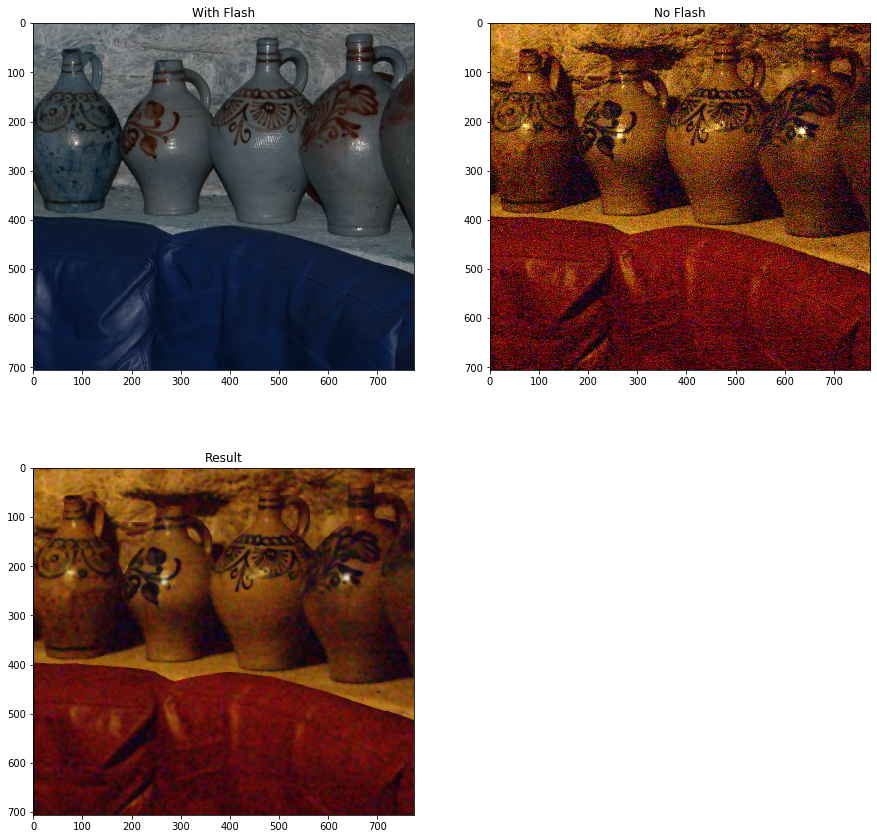

In [12]:
flash = cv2.imread("pots_flash.jpg")
no_flash = cv2.imread("pots_no_flash.jpg")

out = cross_bilateral_filt(no_flash, flash, 7, 110, 15)

f, axs = plt.subplots(figsize=(15,15))

plt.subplot(221)
plt.imshow(flash)
plt.title("With Flash")
plt.subplot(222)
plt.imshow(cv2.cvtColor(no_flash, cv2.COLOR_BGR2RGB))
plt.title("No Flash")
plt.subplot(223)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.title("Result")
plt.show()

# Parameters:
Sigma domain = 110,
Sigma range = 15,
Window size = 7x7

# Q7 Part 2 (Inverse Bilateral)

In [27]:
def inv_bilateral_filt(im, ksize, sigmad, sigmar):
    
    out = np.zeros(im.shape)
    x, y, n = im.shape  
    temp = np.zeros((x+ksize-1, y+ksize-1,n))
    temp[ksize-1:x+ksize-1, ksize-1:y+ksize-1] = im
    weight = np.ones((ksize, ksize, n))
    mid = floor(ksize/2)
    for i in range(x):
        for j in range(y):
            im_part1 = temp[i:i+ksize, j:j+ksize, 0]
            im_part2 = temp[i:i+ksize, j:j+ksize, 1]
            im_part3 = temp[i:i+ksize, j:j+ksize, 2]
            for l in range(ksize):
                for k in range(ksize):
                    w1=exp((-1/(2*sigmad**2))*((l-mid)**2+(k-mid)**2))
                    w2=exp((-1/(2*sigmar**2))*(1-((im_part1[l,k]-im_part1[mid,mid])**2)))
                    w3=exp((-1/(2*sigmar**2))*(1-((im_part2[l,k]-im_part2[mid,mid])**2)))
                    w4=exp((-1/(2*sigmar**2))*(1-((im_part3[l,k]-im_part3[mid,mid])**2)))
                    weight[l,k,0]=w1*w2
                    weight[l,k,1]=w1*w2
                    weight[l,k,2]=w1*w2
            weight=weight/np.sum(weight)
            out[i,j, 0]= np.sum(np.multiply(im_part1,weight[:,:,0]))
            out[i,j, 1]= np.sum(np.multiply(im_part2,weight[:,:,1]))
            out[i,j, 2]= np.sum(np.multiply(im_part3,weight[:,:,2]))
    cv2.normalize(out, out, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    
    out = out.astype(np.uint8)

    return out

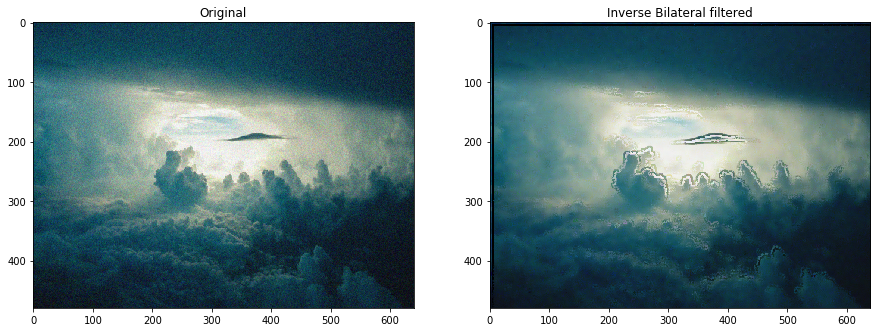

In [28]:
im = cv2.imread("sky.png")

out = inv_bilateral_filt(im,7,12,16)

f, axs = plt.subplots(2,2,figsize=(15,15))

plt.subplot(121)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(122)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.title("Inverse Bilateral filtered")
plt.show()

# Applications of Bilateral filter:

1. It can be used to detect salient features of an image.
2. It is used to differentiate between in-focus and out-of-focus objects in an image. 
3. It can be used to focus the lenses of a camera.